### Getting to learning
<hr style="height:2px;">

- We assume we know the distributions, and hence the **best** rule, but the parameters.
- **Learning** here is nothing but point estimation.
- We consider multinormal case for simplicity.
- So the optimal prediction for $x_{0}$ is $\mathbb{E}_{Y|X=x_{0}}$
- <p>Assume $X$ and $Y$ are normal jointly distributed, where $Z = {Y\choose X}$ ~ $N(\mu_{z}, \Sigma_{z})$, where $\mu_{z} = {\mu_{Y}\choose \mu_{X}}$ and $\Sigma_{z} = {\Sigma_{Y}\choose \Sigma_{X}}$. So we have:

    - $P(Y|X) = N(X|\mu_{Y}+\Sigma_{YX}\Sigma_{XX}^{-1}(X-\mu_{X}), \; \Sigma_{YY}-\Sigma_{YX}\Sigma_{XX}^{-1}\Sigma_{XY})$
    - $f^{*}(X) = \mu_{Y}+\Sigma_{YX}\Sigma_{XX}^{-1}(X-\mu_{X})$

    
- So, the optimal prediction $\mathbb{E}_{Y|X}$ is nothing but a linear combination of $X$.
- For scaler $X$:
    - $f^{*}(X) = \mu_{Y} + (X-\mu_{X})^T\frac{\sigma_{XY}}{\sigma_{XX}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parameter_est(samples=[100], mu=[3, 3], s1=1.5, s2=1.5, r=0.8, scatter=False, ax=None):
    
    # compute the sigma using variances and correlation
    sigma=np.array([[s1**2, s1*s2*r], 
                    [s1*s2*r, s2**2]])
    
    x=np.linspace(-5, 10, 100)
    
    if not ax:
        fig, ax = plt.subplots()
        
    for i, s in enumerate(samples):
        # sample from the distribution
        XY = np.random.default_rng().multivariate_normal(mu, sigma, s)
        
        # calculate sample mean an cov
        muhat = [np.mean(XY[:,0]),np.mean(XY[:,1])]
        sigmahat=np.cov([XY[:,0], XY[:,1]])
        
        # create ture and estimated regression lines        
        y = mu[1] + sigma[1][0]/(sigma[0][0]) * (x-mu[0])
        yhat = muhat[1] + sigmahat[1][0]/(sigmahat[0][0]) * (x-muhat[0])

        if scatter:
            ax.scatter(XY[:,0], XY[:,1], color='b')
        
        ax.plot(x, yhat, '-r', label='Estimator')
        ax.text(-4.5, 9, 'N = {}'.format(s), fontsize=15)

    ax.plot(x, y, '-b', label='Best')
    ax.legend()
    ax.set_xlim(-5, 10)
    ax.set_ylim(-5, 10)
    return ax

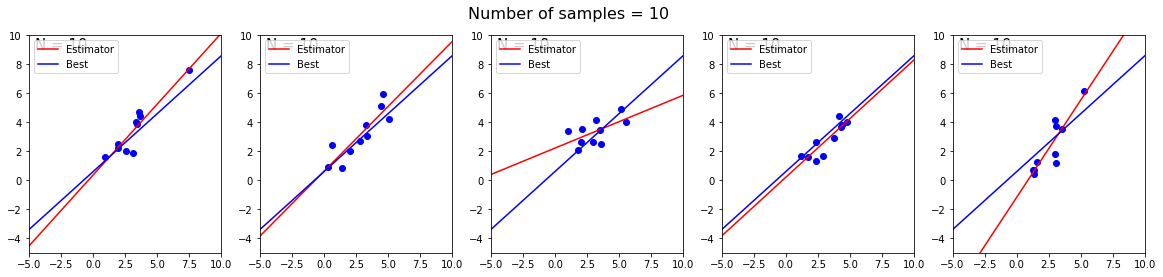

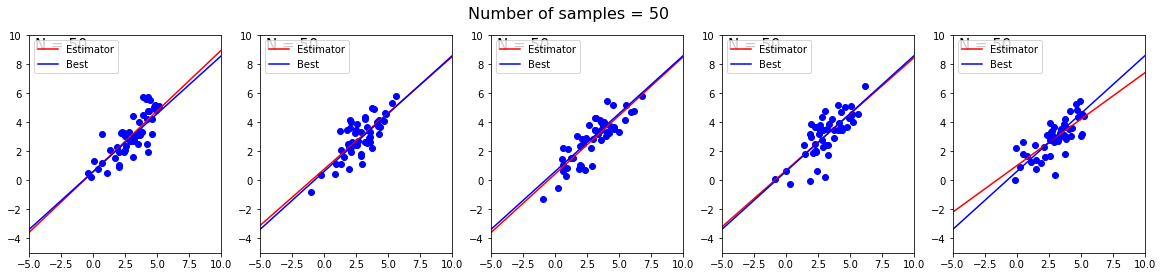

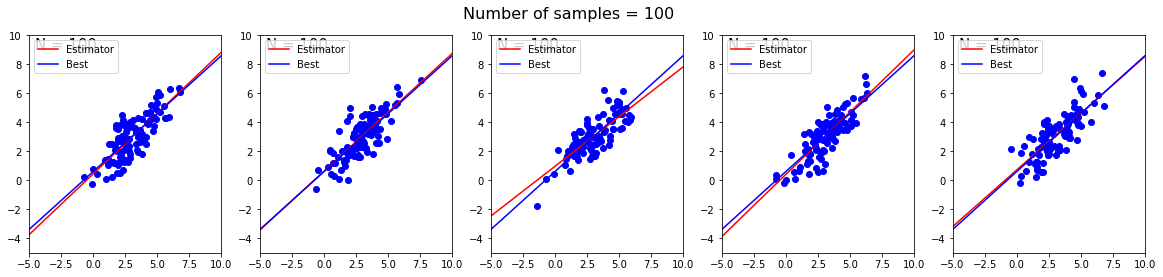

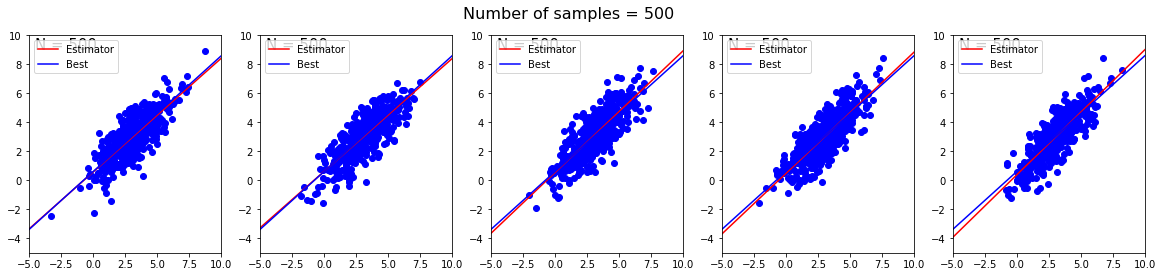

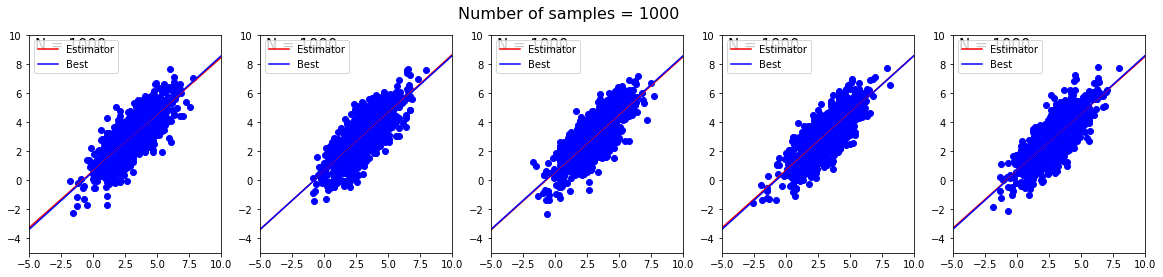

In [3]:
for i, s in enumerate([10, 50, 100, 500, 1000]): 
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))
    fig.suptitle('Number of samples = %d'%s, fontsize=16)
    for i in range(5):
        parameter_est(samples=[s], scatter=True, ax=axes[i])

### Animated data fitting

In [4]:
from PIL import Image
import os

frames = []
try:
    os.mkdir('temp_gif')
except:
    pass

for s in range(10, 500, 10):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax = parameter_est(samples=[s], scatter=True, ax=ax)
    ax.legend(bbox_to_anchor=(0,0,1,1), loc="upper right")
    plt.savefig('temp_gif/img_%d.png'%s)
    plt.close(fig)
    new_frame = Image.open('temp_gif/img_%d.png'%s)
    frames.append(new_frame)

In [5]:
frames[0].save('animation.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=500, loop=0)

<img src="animation.gif">